# Title: Predicting Titanic Survival: A Machine Learning Project


# Introduction

In this machine learning project, we tackle the classic problem of predicting passenger survival on the Titanic. We'll use various features like age, gender, ticket class, and more to build a model that can accurately predict whether a passenger survived or not.



In [1]:
#call necessery library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Algorithms 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
# pre-porcessing ofr data 
from sklearn.preprocessing import LabelEncoder

# for cels
import warnings
warnings.filterwarnings("ignore")


In [2]:
# read data _test and train 
df_test = pd.read_csv("/kaggle/input/titanic/test.csv")
df_train = pd.read_csv("/kaggle/input/titanic/train.csv")

# Dataset Overview

We used the famous Titanic dataset from Kaggle, which provides information on passengers including features like age, gender, ticket class, and whether they survived or not. The goal is to build a predictive model based on this data.



In [3]:
print("Training data shape:{0}".format(df_train.shape))

Training data shape:(891, 12)


In [4]:
print("Training data column names:\n {0}".format(df_train.columns))

Training data column names:
 Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [5]:
print("Information on data :",df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
Information on data : None


In [6]:
# data train
df_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


# Data Preprocessing
* Handled missing values: We dealt with missing values in features like 'Age' and 'Embarked' using appropriate techniques.
* Feature engineering: We extracted titles from the 'Name' column and converted categorical variables into numerical format.
* Visualized relationships: We used visualizations to understand the relationships between different features and survival rates.


Here I tried to delete all the null's ​​in the data, but this led to the loss of a very large amount of data, and this did not help the cities in obtaining the best accuracy, so we will replace the money with values ​​that correspond to the column itself.

In [7]:
#show the ferst five rows
df_train["Cabin"].head(5)

0     NaN
1     C85
2     NaN
3    C123
4     NaN
Name: Cabin, dtype: object

In [8]:
df_train["Cabin"].isnull().sum()

687

In [9]:
df_train["Cabin"].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

Here we have created a function that encrypts the data based on the success data for each row

In [10]:
def Target_Encoding(X,y,df):
    mean_encoded_data = df.groupby(X)[y].mean().to_dict()
    df[X] = df[X].map(mean_encoded_data)
    return df[X]


In [11]:
df_train["Cabin"] = Target_Encoding("Cabin","Survived",df_train)
df_test["Cabin"] = Target_Encoding("Cabin","Survived",df_train)

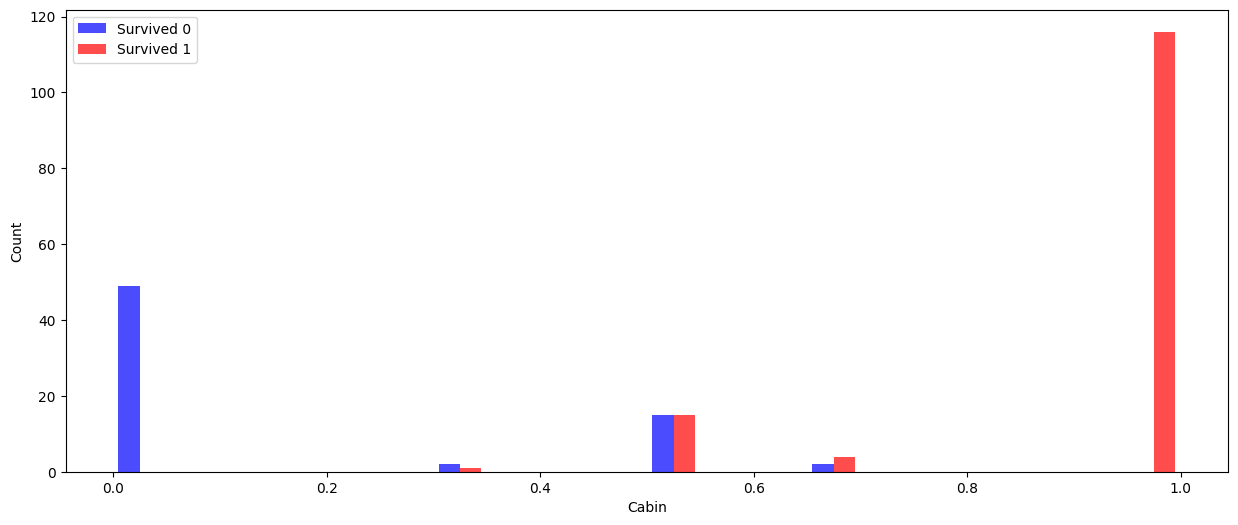

In [12]:
# Filter data for survived and not survived
survived_1 = df_train[df_train['Survived'] == 1]['Cabin']
survived_0 = df_train[df_train['Survived'] == 0]['Cabin']

# Create a grouped bar chart
plt.figure(figsize=(15, 6))
plt.hist([survived_0, survived_1], label=['Survived 0', 'Survived 1'], color=['blue', 'red'], alpha=0.7, bins=20)

# Add labels and title
plt.xlabel('Cabin')
plt.ylabel('Count')
plt.legend()

# Show the plot
plt.show()


Here I will fill in the blanks using the average survival. This idea may not be correct, but we will try

In [13]:
# Calculate the overall mean survival rate
overall_mean_survival = df_train['Survived'].mean()

# Fill remaining missing values with the overall mean
df_train['Cabin'].fillna(overall_mean_survival, inplace=True)
df_test['Cabin'].fillna(overall_mean_survival, inplace=True)



In [14]:
df_train["Cabin"].head(5)

0    0.383838
1    1.000000
2    0.383838
3    0.500000
4    0.383838
Name: Cabin, dtype: float64

In [15]:
# cheak test data
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,0.383838,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,1.000000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,0.383838,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,0.500000,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,0.383838,S


In [16]:
print(f"Show the first five rows {df_train.head()}")

Show the first five rows    PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare     Cabin Embarked  
0      0         A/5 21171   7.2500  0.383838        S  
1      0          PC 17599  71.2833  1.000000        C  
2      0  STON/O2. 3101282   7.9250  0.383838        S  
3      0            113803  53.1000  0.500000        S  
4      0  

In [17]:
print(df_train["Survived"].describe())

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64


(array([549.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0., 342.]),
 array([0.        , 0.03333333, 0.06666667, 0.1       , 0.13333333,
        0.16666667, 0.2       , 0.23333333, 0.26666667, 0.3       ,
        0.33333333, 0.36666667, 0.4       , 0.43333333, 0.46666667,
        0.5       , 0.53333333, 0.56666667, 0.6       , 0.63333333,
        0.66666667, 0.7       , 0.73333333, 0.76666667, 0.8       ,
        0.83333333, 0.86666667, 0.9       , 0.93333333, 0.96666667,
        1.        ]),
 <BarContainer object of 30 artists>)

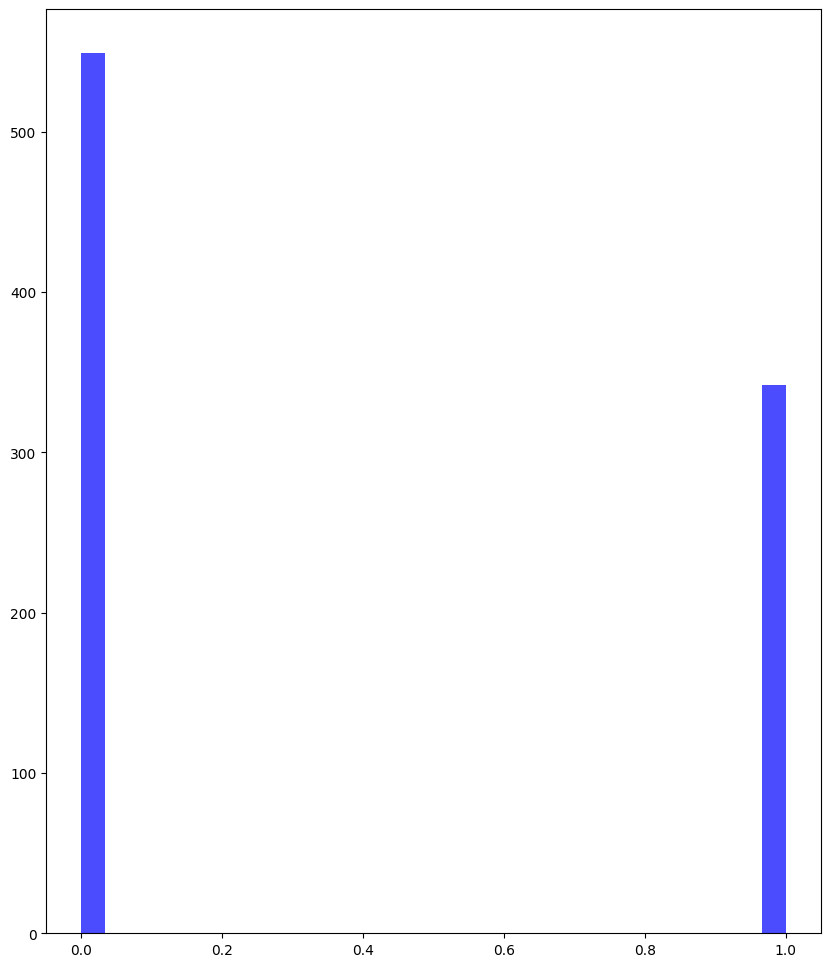

In [18]:
# ploting data Survived
plt.figure(figsize=(10,12))

plt.hist(df_train["Survived"], bins=30, color='blue', alpha=0.7)


In [19]:
df_test = df_test.drop(columns=['PassengerId'])

In [20]:
df_train = df_train.drop(columns=['PassengerId'])

* pclass refers to passenger class (1st, 2nd, 3rd), and is a proxy for socio-economic class. Age is in years, and some infants had fractional values. The titanic2 data frame has no missing data and includes records for the crew, but age is dichotomized at adult vs. child.


In [21]:
#  Show the first five rows (Pclass)
print("First Five rows \n",df_train["Pclass"].head())

First Five rows 
 0    3
1    1
2    3
3    1
4    3
Name: Pclass, dtype: int64


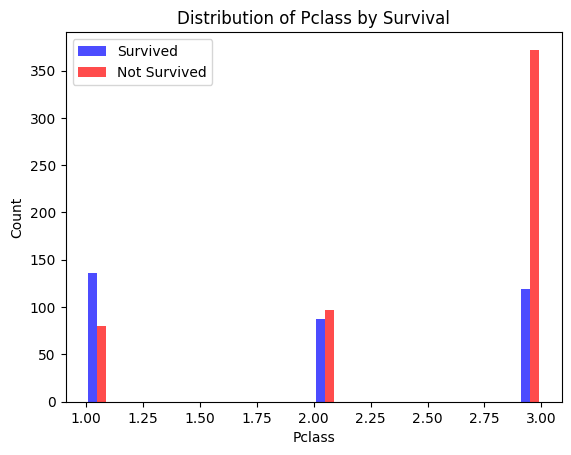

In [22]:
# Group data by 'Survived' and 'Pclass'
survived_Pclass = df_train[df_train['Survived'] == 1]['Pclass']
not_survived_Pclass = df_train[df_train['Survived'] == 0]['Pclass']

# Create a grouped bar plot
plt.hist([survived_Pclass, not_survived_Pclass], bins=20, label=['Survived', 'Not Survived'], alpha=0.7, color=['blue', 'red'])

# Add labels and title
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.title('Distribution of Pclass by Survival')

# Add legend
plt.legend()

# Show the plot
plt.show()


We see here that the success rate in the third degree was very small, and the percentage of success was greater in the first degree.

In [23]:
# Check for missing values in the "Pclass" column
missing_values_pclass = df_train["Pclass"].isnull()

# Print the result
print("Number of missing values pclass",missing_values_pclass.sum())

Number of missing values pclass 0


sibsp. Number of Siblings/Spouses Aboard. parch. Number of Parents/Children Aboard.


In [24]:
# show the first five rows in sibsp
print("First Five rows \n " ,df_train["SibSp"].head(10))

First Five rows 
  0    1
1    1
2    0
3    1
4    0
5    0
6    0
7    3
8    0
9    1
Name: SibSp, dtype: int64


- Here for the people who came alone, the column was zero, meaning zero for the person alone, while the column one meant one person with the person who came, i.e. two and three. We will create a new column for the total number of people who attended the trip.

In [25]:
df_train["SibSp_total"] = df_train["SibSp"]+1
df_test["SibSp_total"] = df_test["SibSp"]+1



In [26]:
df_test  = df_test.drop(columns =["SibSp"])
df_train = df_train.drop(columns =["SibSp"])

In [27]:
df_train["SibSp_total"]

0      2
1      2
2      1
3      2
4      1
      ..
886    1
887    1
888    2
889    1
890    1
Name: SibSp_total, Length: 891, dtype: int64

In [28]:
#People who survived relative to SibSp_total
Survived_SibSp = df_train[df_train['Survived'] == 1]['SibSp_total']
nonSurvived_SibSp = df_train[df_train['Survived'] == 0]['SibSp_total']

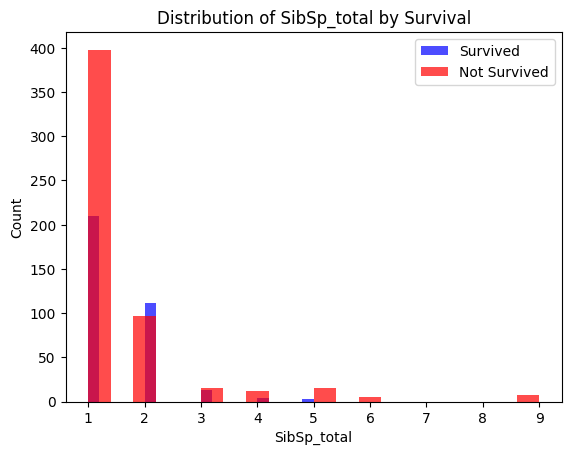

In [29]:
# Show People who survived relative to SibSp_total
# Create a histogram for Survived_SibSp
plt.hist(Survived_SibSp, bins=20, label='Survived', alpha=0.7, color='blue')

# Create a histogram for nonSurvived_SibSp
plt.hist(nonSurvived_SibSp, bins=20, label='Not Survived', alpha=0.7, color='red')

# Add labels and title
plt.xlabel('SibSp_total')
plt.ylabel('Count')
plt.title('Distribution of SibSp_total by Survival')

# Add legend
plt.legend()

# Show the plot
plt.show()


Parch - how many children & parents of the passenger aboard the Titanic

In [30]:
# Show the first five rows
print("The first five rows \n",df_train["Parch"])

The first five rows 
 0      0
1      0
2      0
3      0
4      0
      ..
886    0
887    0
888    2
889    0
890    0
Name: Parch, Length: 891, dtype: int64


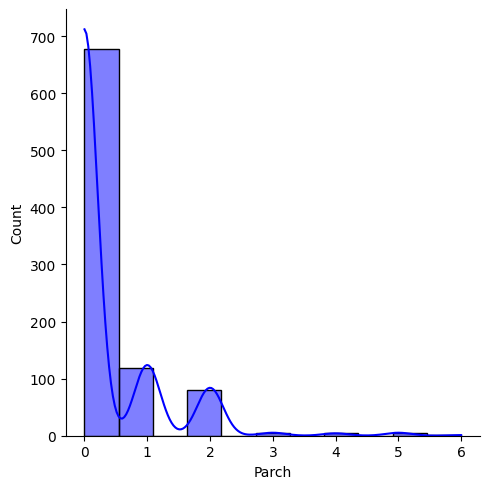

In [31]:
# Displot Parch
sns.displot(df_train["Parch"], kde=True, color='blue')

In [32]:
# Survival rate for Parch
Survived_Parch = df_train[df_train['Survived'] == 1]['Parch']
nonSurvived_Parch = df_train[df_train['Survived'] == 0]['Parch']

In [33]:
Survived_Parch_ = (Survived_Parch / df_train.shape[0]) * 100

In [34]:
# Show result 
print("Survival rate: {0}".format(Survived_Parch_.sum()))

Survival rate: 17.845117845117848


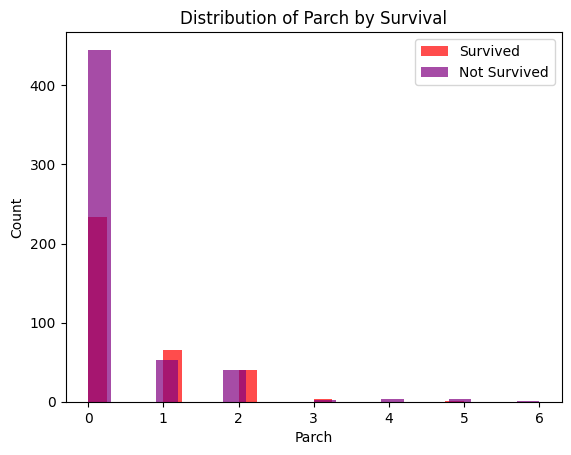

In [35]:

# Create a histogram for Survived_Parch
plt.hist(Survived_Parch, bins=20, label='Survived', alpha=0.7, color='red')

# Create a histogram for nonSurvived_Parch
plt.hist(nonSurvived_Parch, bins=20, label='Not Survived', alpha=0.7, color='purple')

# Add labels and title
plt.xlabel('Parch')
plt.ylabel('Count')
plt.title('Distribution of Parch by Survival')

# Add legend
plt.legend()

# Show the plot
plt.show()


In [36]:
# Show Fare
df_test["Fare"]

0        7.8292
1        7.0000
2        9.6875
3        8.6625
4       12.2875
         ...   
413      8.0500
414    108.9000
415      7.2500
416      8.0500
417     22.3583
Name: Fare, Length: 418, dtype: float64

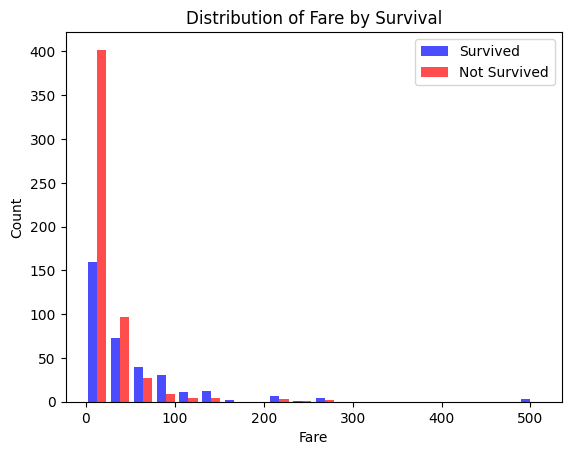

In [37]:
# Group data by 'Survived' and 'Fare'
survived_fares = df_train[df_train['Survived'] == 1]['Fare']
not_survived_fares = df_train[df_train['Survived'] == 0]['Fare']

# Create a grouped bar plot
plt.hist([survived_fares, not_survived_fares], bins=20, label=['Survived', 'Not Survived'], alpha=0.7, color=['blue', 'red'])

# Add labels and title
plt.xlabel('Fare')
plt.ylabel('Count')
plt.title('Distribution of Fare by Survival')

# Add legend
plt.legend()

# Show the plot
plt.show()


In [38]:
#Pre_proscessing null's (test)
df_test["Fare"] = df_test["Fare"].fillna(df_train.Fare.mean())


After graphical analysis of the digital data, we found that this data does not help much in the survival of passengers. Therefore, we will analyze categorical data to ascertain the best features that help the model get the best prediction accuracy.

In [39]:
# Show first five rows (Age)
print("Age :",df_train["Age"])

Age : 0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64


In [40]:
# Number of null's
print("Number of null's: {0} ".format(df_train["Age"].isnull().sum()))

Number of null's: 177 


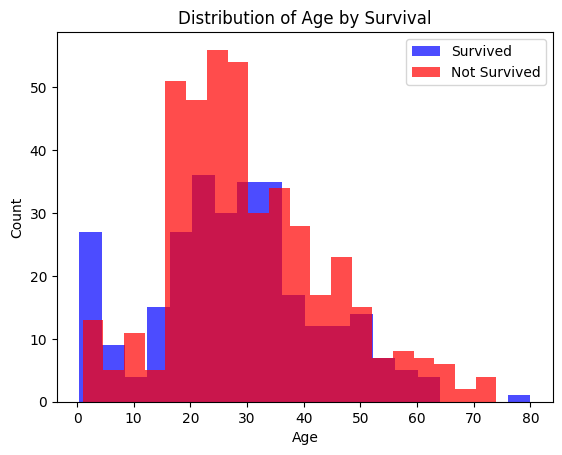

In [41]:
# Survival rate for Age
Survived_Parch = df_train[df_train['Survived'] == 1]['Age']
nonSurvived_Parch = df_train[df_train['Survived'] == 0]['Age']

# Create a histogram for Survived_Parch with color blue
plt.hist(Survived_Parch, bins=20, label='Survived', alpha=0.7, color='blue')

# Create a histogram for nonSurvived_Parch with color red
plt.hist(nonSurvived_Parch, bins=20, label='Not Survived', alpha=0.7, color='red')

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age by Survival')

# Add legend
plt.legend()

# Show the plot
plt.show()


In [42]:
# calculate the correlation between Age & Survived
correlation = df_train['Age'].corr(df_train['Survived'])

print(f"Correlation between Age and Survived: {correlation}")


Correlation between Age and Survived: -0.07722109457217768


In [43]:
# pre_processing for Null's in Age
df_train["Age"] = df_train["Age"].fillna(df_train.Age.mean())
df_test["Age"] = df_test["Age"].fillna(df_train.Age.mean())



In [44]:
#cheak train 
df_train['Age'].head(10)


0    22.000000
1    38.000000
2    26.000000
3    35.000000
4    35.000000
5    29.699118
6    54.000000
7     2.000000
8    27.000000
9    14.000000
Name: Age, dtype: float64

In [45]:
print("_________cheak_test______________ \n")
df_test["Age"].head(10)

_________cheak_test______________ 



0    34.5
1    47.0
2    62.0
3    27.0
4    22.0
5    14.0
6    30.0
7    26.0
8    18.0
9    21.0
Name: Age, dtype: float64

In [46]:
df_train['Age'].isnull().sum()

0

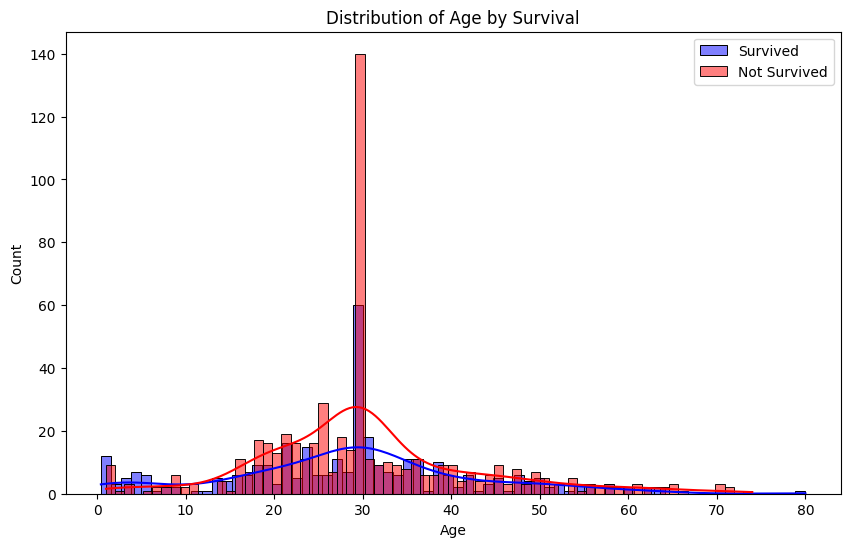

In [47]:
survived = df_train[df_train['Survived'] == 1]
not_survived = df_train[df_train['Survived'] == 0]

# Create histograms for Age
plt.figure(figsize=(10, 6))
sns.histplot(survived['Age'], label='Survived', kde=True, color='blue', bins=70)
sns.histplot(not_survived['Age'], label='Not Survived', kde=True, color='red', bins=70)

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age by Survival')
plt.legend()

# Show the plot
plt.show()

In [48]:
# Relation between Survived  another columens 
string_columns = df_train.select_dtypes(include='object').columns
df_corr = df_train.drop(string_columns,axis=1)
corr = df_corr.corr()

<Figure size 1000x1200 with 0 Axes>

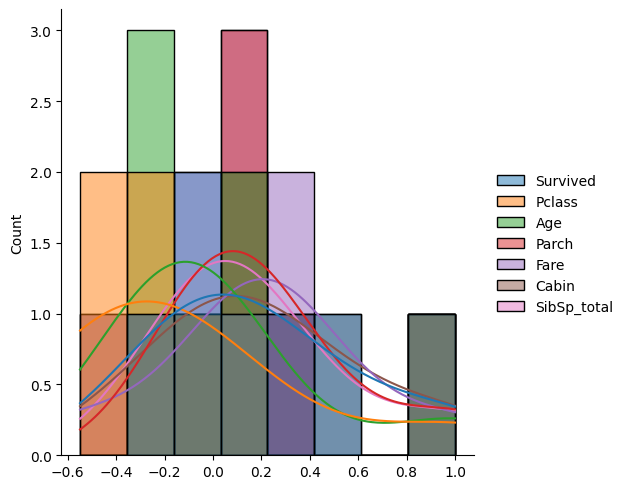

In [49]:
plt.figure(figsize=(10,12))
sns.displot(corr, kde=True, color='blue')

<Axes: >

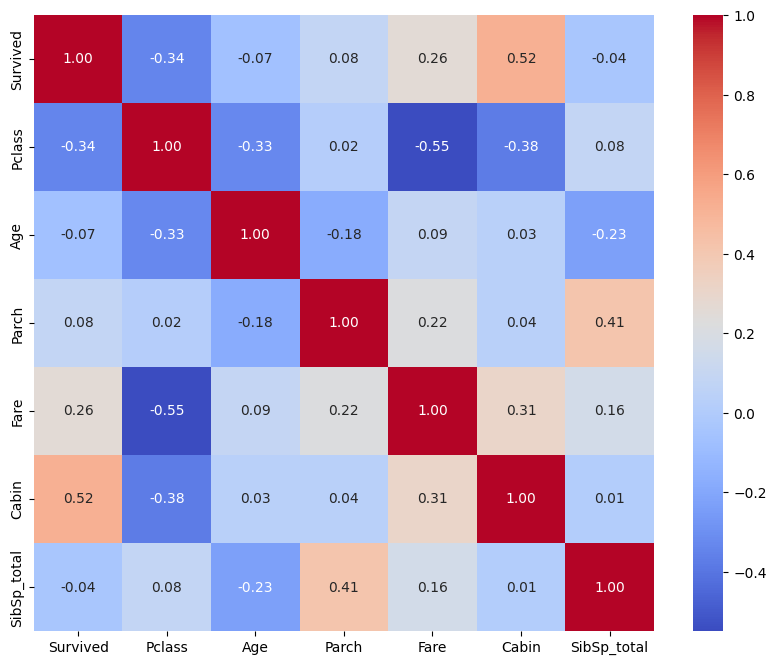

In [50]:
# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")

# categorical data

In [51]:
# show columns Sex
print(df_train["Sex"][5])

male


In [52]:
# lambda function to convert categories to binary
binary_converter = lambda X : 1 if X == "female" else 0
df_train["Sex"] = df_train["Sex"].apply(binary_converter)
df_test["Sex"]= df_test["Sex"].apply(binary_converter)


In [53]:
df_train["Sex"][5]

0

<Figure size 800x400 with 0 Axes>

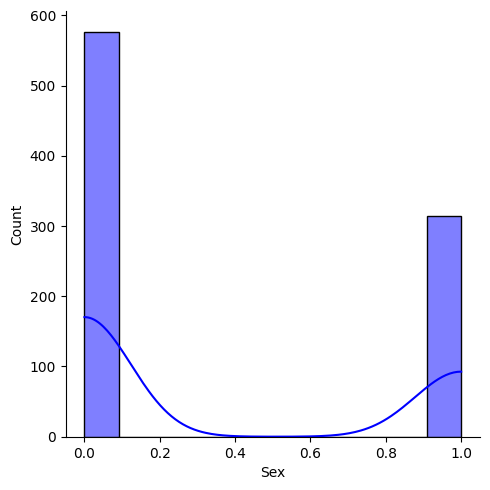

In [54]:
# plot Sex

plt.figure(figsize=(8,4))
sns.displot(df_train.Sex, kde=True, color='blue')

In [55]:
Sex = list(df_train.Sex)
print(Sex[:6])

[0, 1, 1, 1, 0, 0]


In [56]:
# How many Male  and how many Female 
Female=0
Male=0
for i in Sex:
    if i == 0:
        Male=Male+1
    else:
        Female =Female+1
        
print(" Number of Male:{0}\n Number of Female:{1}".format(Male,Female))

 Number of Male:577
 Number of Female:314


In [57]:
#Female ratio
Total_Sex = df_train["Sex"].shape[0]
Female_percent =((Female)/Total_Sex)*100
print(f"Female Ratio:{Female_percent}")




Female Ratio:35.24130190796858


In [58]:
#Male ratio
Male_percent =((Male)/Total_Sex)*100

print(f"Male Ratio:{Male_percent}")

Male Ratio:64.75869809203144


In [59]:
# How many Male is Survied  and how many Female is Survied 

Male_Survived  = len(df_train[(df_train['Sex'] == 0) & (df_train['Survived'] == 1)])
Female_Survived = len(df_train[(df_train['Sex'] == 1) & (df_train['Survived'] == 1)])

                
print("Male is survived :{0}".format(Male_Survived))
print("Female is survived :{0}".format(Female_Survived))

    

Male is survived :109
Female is survived :233


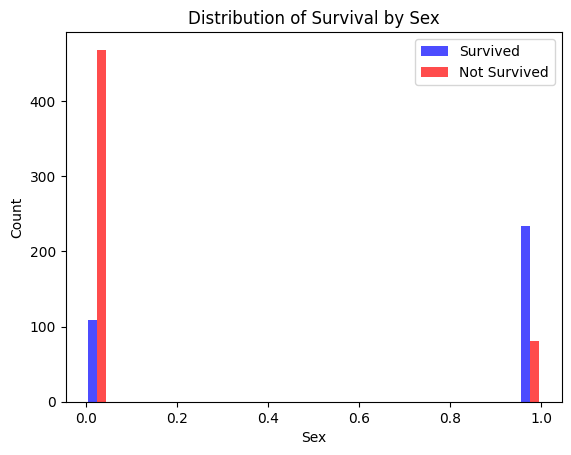

In [60]:
import matplotlib.pyplot as plt

# Group data by 'Survived' and 'Sex'
survived_sex = df_train[df_train['Survived'] == 1]['Sex']
not_survived_sex = df_train[df_train['Survived'] == 0]['Sex']

# Create a grouped bar plot
plt.hist([survived_sex, not_survived_sex], bins=20, label=['Survived', 'Not Survived'], alpha=0.7, color=['blue', 'red'])

# Add labels and title
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Distribution of Survival by Sex')

# Add legend
plt.legend()

# Show the plot
plt.show()


After reviewing the previous analysis of the gender of the passengers, we see that the number of women who survived the signs of the Titanic is much greater than the number of men who survived, knowing that the number of men was greater than the number of women on the ship. Therefore, we see that the gender column is very strong and affects survival on the ship.

In [61]:
# show columns Ticket 
df_train["Ticket"]

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

In [62]:
df_train = df_train.drop(columns=['Ticket'])
df_test = df_test.drop(columns=['Ticket'])


In this step, we have converted the tick column into several columns containing the tick type

In [63]:
df_train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Parch', 'Fare', 'Cabin',
       'Embarked', 'SibSp_total'],
      dtype='object')

In [64]:
#Show columns Embarked
df_train.Embarked.head()

0    S
1    C
2    S
3    S
4    S
Name: Embarked, dtype: object

In [65]:
df_train.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

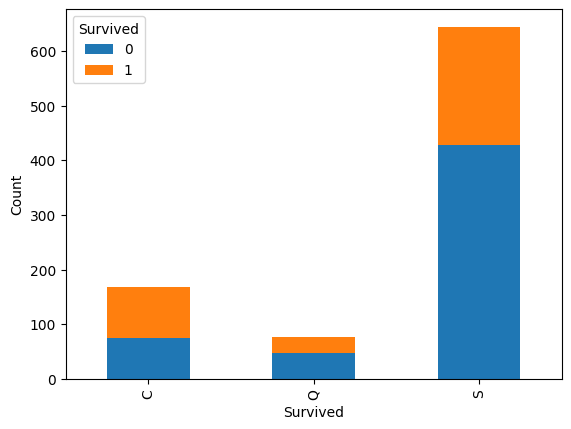

In [66]:
counts = df_train.groupby(['Embarked','Survived']).size().unstack()

# Create a stacked bar chart
counts.plot(kind='bar', stacked=True)

# Add labels and title
plt.xlabel('Survived')
plt.ylabel('Count')

# Show the plot
plt.show()

In [67]:
# Replace null's to zeros
df_train["Embarked"].fillna(0)
df_test["Embarked"].fillna(0)

0      Q
1      S
2      Q
3      S
4      S
      ..
413    S
414    C
415    S
416    S
417    C
Name: Embarked, Length: 418, dtype: object

In [68]:
# convert characters to numbert 
# define a dictionary 
charcterTo_number = {"S":1,"Q":2,"C":3}
# Replace 
df_train["Embarked"]=df_train["Embarked"].replace(charcterTo_number)
# for data test
df_test["Embarked"]=df_test["Embarked"].replace(charcterTo_number)

#________________________
dd=df_train["Embarked"]
# Show result
print(f"Replace result:\n{dd.head()} ")

Replace result:
0    1.0
1    3.0
2    1.0
3    1.0
4    1.0
Name: Embarked, dtype: float64 


In [69]:
# show Name
df_train.Name

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [70]:
#filtering the name

df_train["Name"] = df_train["Name"].fillna(0).str.extract(r',\s*([^\.]+)\.', expand=False).str.lower()
df_test["Name"] = df_test["Name"].fillna(0).str.extract(r',\s*([^\.]+)\.', expand=False).str.lower()



In this example, we only want titles or titles, so we will use this code to do that

In [71]:
df_train["Name"]

0        mr
1       mrs
2      miss
3       mrs
4        mr
       ... 
886     rev
887    miss
888    miss
889      mr
890      mr
Name: Name, Length: 891, dtype: object

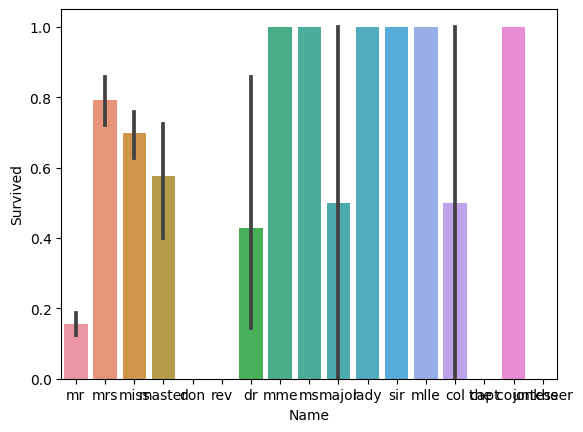

In [72]:
sns.barplot(x=df_train["Name"], y=df_train["Survived"], data=df_train)
plt.show()


In [73]:
# conver categorical to numbrical 
label_encoder = LabelEncoder()
df_train["Name"] = label_encoder.fit_transform(df_train["Name"])
df_test["Name"] = label_encoder.fit_transform(df_test["Name"])

In [74]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pclass       418 non-null    int64  
 1   Name         418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   Parch        418 non-null    int64  
 5   Fare         418 non-null    float64
 6   Cabin        418 non-null    float64
 7   Embarked     418 non-null    int64  
 8   SibSp_total  418 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 29.5 KB


# Model Selection
We tried several classification algorithms including Logistic Regression, Support Vector Machines, Random Forest, and ensemble techniques like Bagging.

In [75]:
# splet split 
X_train = df_train.drop(columns=["Survived"])
y_train =df_train.Survived
X_train = X_train.dropna()
y_train = y_train[X_train.index]  
#____
X_test = df_test

In [76]:
# Logisitc Regression 
LR_M = LogisticRegression(
    solver='newton-cg',
    max_iter=1000,
    random_state=42
)
LR_M.fit(X_train,y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='newton-cg')

In [77]:
#coefficients (weights) assigned to each feature by the trained logistic regression model.
print("Weights to each featury:",LR_M.coef_)


Weights to each featury: [[-7.66382276e-01 -4.52429969e-02  2.50242853e+00 -3.60687560e-02
  -6.64001827e-02  1.34326381e-03  4.70249779e+00  1.73694258e-01
  -3.79120514e-01]]


In [78]:
#.the accuracy of the model on the training data.
print("Accuracy of the model on the training data(LR): {0}".format(LR_M.score(X_train,y_train)))

Accuracy of the model on the training data(LR): 0.8492688413948256


In [79]:
# predict Y
y_perd_LR = LR_M.predict(X_test)

In [80]:
SVM_M=SVC(C=0.6,kernel='linear')
SVM_M.fit(X_train,y_train)

SVC(C=0.6, kernel='linear')

In [81]:
#coefficients (weights) assigned to each feature by the trained Support Vector Classification model.
print("Weights to each featury:\n",SVM_M.coef_)

Weights to each featury:
 [[-4.53026771e-02  7.72586977e-03  2.04554898e+00 -3.72266588e-03
  -5.20524841e-02  1.10322924e-03  3.43910665e+00  2.37233048e-02
  -2.21711590e-01]]


In [82]:
#.the accuracy of the model on the training data.
print("Accuracy of the model on the training data(SVM): {0}".format(SVM_M.score(X_train,y_train)))

Accuracy of the model on the training data(SVM): 0.8380202474690663


In [83]:
# predict Y
y_perd_SVM = SVM_M.predict(X_test)

In [84]:
RF_M = RandomForestClassifier()
RF_M.fit(X_train,y_train)

RandomForestClassifier()

In [85]:
#.the accuracy of the model on the training data.
print("Accuracy of the model on the training data(RF): {0}".format(RF_M.score(X_train,y_train)))

Accuracy of the model on the training data(RF): 0.9876265466816648


In [86]:
# predict Y
y_perd_RF = RF_M.predict(X_test)

In [87]:
# use Bagging Classifier 
# Create BaggingClassifier with three base classifiers
bagging_classifier = BaggingClassifier(base_estimator=RF_M, n_estimators=3, random_state=42)



In [88]:
# Train the BaggingClassifier
bagging_classifier.fit(X_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(), n_estimators=3,
                  random_state=42)

In [89]:
bagging_classifier.score(X_train,y_train)

0.9415073115860517

In [90]:
y_bagging=bagging_classifier.predict(X_test)

In [91]:
# Output 

submission = pd.read_csv("/kaggle/input/titanic/gender_submission.csv")

In [92]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [93]:
len(submission["Survived"])

418

In [94]:
submission["Survived"] = y_perd_LR
submission.to_csv("submission_LR.csv", index=False)


In [95]:
submission["Survived"] = y_perd_SVM
submission.to_csv("submission_SVM.csv", index=False)

In [96]:
submission["Survived"] = y_perd_RF
submission.to_csv("submission_RF.csv", index=False)

In [97]:
submission["Survived"] = y_bagging
submission.to_csv("submission_bagging.csv", index=False)

# Conclusion
In this project, we successfully built a machine learning model to predict passenger survival on the Titanic. We demonstrated the importance of data preprocessing, feature engineering, and model selection in achieving accurate predictions.

# Future Work
There are several ways to improve this project:

* Experiment with more advanced algorithms like Gradient Boosting or Neural Networks.
* Incorporate additional features or external data sources for better predictions.
* Fine-tune hyperparameters to optimize model performance.

# Acknowledgements
We would like to thank Kaggle for providing the Titanic dataset and the machine learning community for valuable insights.